# Phishing Classifier 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing DataSet

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Phishing-Classifier/main/Phishing_Legitimate_full.csv")

In [3]:
# Overview of the dataset
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
# display the rows and columns of the dataset
df.shape

(10000, 50)

In [5]:
# Dropping 'id' column because it is not required
df.drop(labels='id',axis=1,inplace=True)

In [6]:
# Installing sweetviz library to analyze and visualize the data

In [7]:
#!pip install sweetviz

In [8]:
#import sweetviz as sv

In [9]:
#report = sv.analyze(df)
#report.show_html("report.html")

In [10]:
#!pip install autoviz

In [11]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()

In [12]:
#auto_report = AV.AutoViz("https://raw.githubusercontent.com/ektanegi25/Phishing-Classifier/main/Phishing_Legitimate_full.csv", depVar='CLASS_LABEL')

In [13]:
# to see information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [14]:
# Changing Dtype from int64, float64 to int32, float32 

In [15]:
float_cols = df.select_dtypes('float64').columns

In [16]:
for cols in float_cols:
    df[cols] = df[cols].astype('float32')

In [17]:
int_cols = df.select_dtypes('int64').columns

In [18]:
for cols in int_cols:
    df[cols] = df[cols].astype('int32')

In [19]:
# converted 64bits to 32bits
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int32  
 1   SubdomainLevel                      10000 non-null  int32  
 2   PathLevel                           10000 non-null  int32  
 3   UrlLength                           10000 non-null  int32  
 4   NumDash                             10000 non-null  int32  
 5   NumDashInHostname                   10000 non-null  int32  
 6   AtSymbol                            10000 non-null  int32  
 7   TildeSymbol                         10000 non-null  int32  
 8   NumUnderscore                       10000 non-null  int32  
 9   NumPercent                          10000 non-null  int32  
 10  NumQueryComponents                  10000 non-null  int32  
 11  NumAmpersand                        10000 

In [20]:
# Renaming label column from CLASS_LABEL to label

In [21]:
df.rename(columns={'CLASS_LABEL':'Labels'},inplace=True)

In [22]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Labels
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [23]:
# some random sample from the dataset

In [24]:
df.sample(10)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Labels
2999,4,2,3,64,4,4,0,0,0,0,...,0,0,0,0,0,1,1,1,-1,1
6933,2,0,2,61,1,1,0,0,0,0,...,0,0,0,1,0,1,1,1,1,0
7466,2,0,4,132,2,0,0,0,1,0,...,1,0,0,1,-1,1,1,0,1,0
8021,4,1,4,72,2,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
6811,3,1,4,70,0,0,0,0,1,0,...,0,0,0,1,0,1,1,1,1,0
1106,6,1,2,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
1249,2,0,3,43,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,-1,1
5886,2,0,2,68,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,1,0
2819,5,2,1,65,1,1,0,0,1,0,...,0,0,0,0,0,-1,1,-1,-1,1
7250,3,1,2,121,6,0,0,0,1,0,...,0,0,0,1,-1,-1,1,-1,1,0


In [25]:
# Basic Statistics of the dataset

In [26]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Labels
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


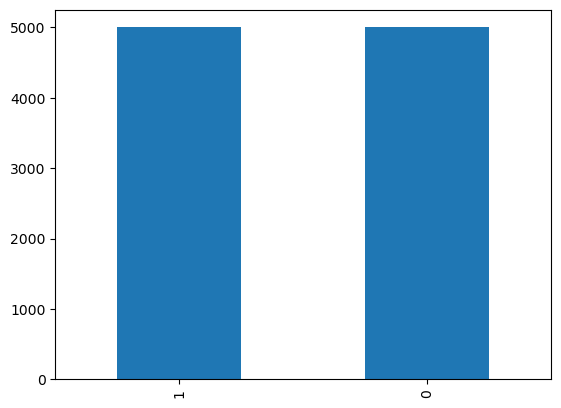

In [27]:
df['Labels'].value_counts().plot(kind='bar')
plt.show()

In [28]:
## Making function to see correlation of features

In [29]:
def corr_heatmap(data,idx_s,idx_e):
    
    y = data['Labels']
    
    temp = data.iloc[:,idx_s:idx_e]
    
    if 'id' in temp.columns:
        del temp['id']
        
    temp['Labels'] = y
    
    sns.heatmap(temp.corr(),annot=True)
    plt.show()


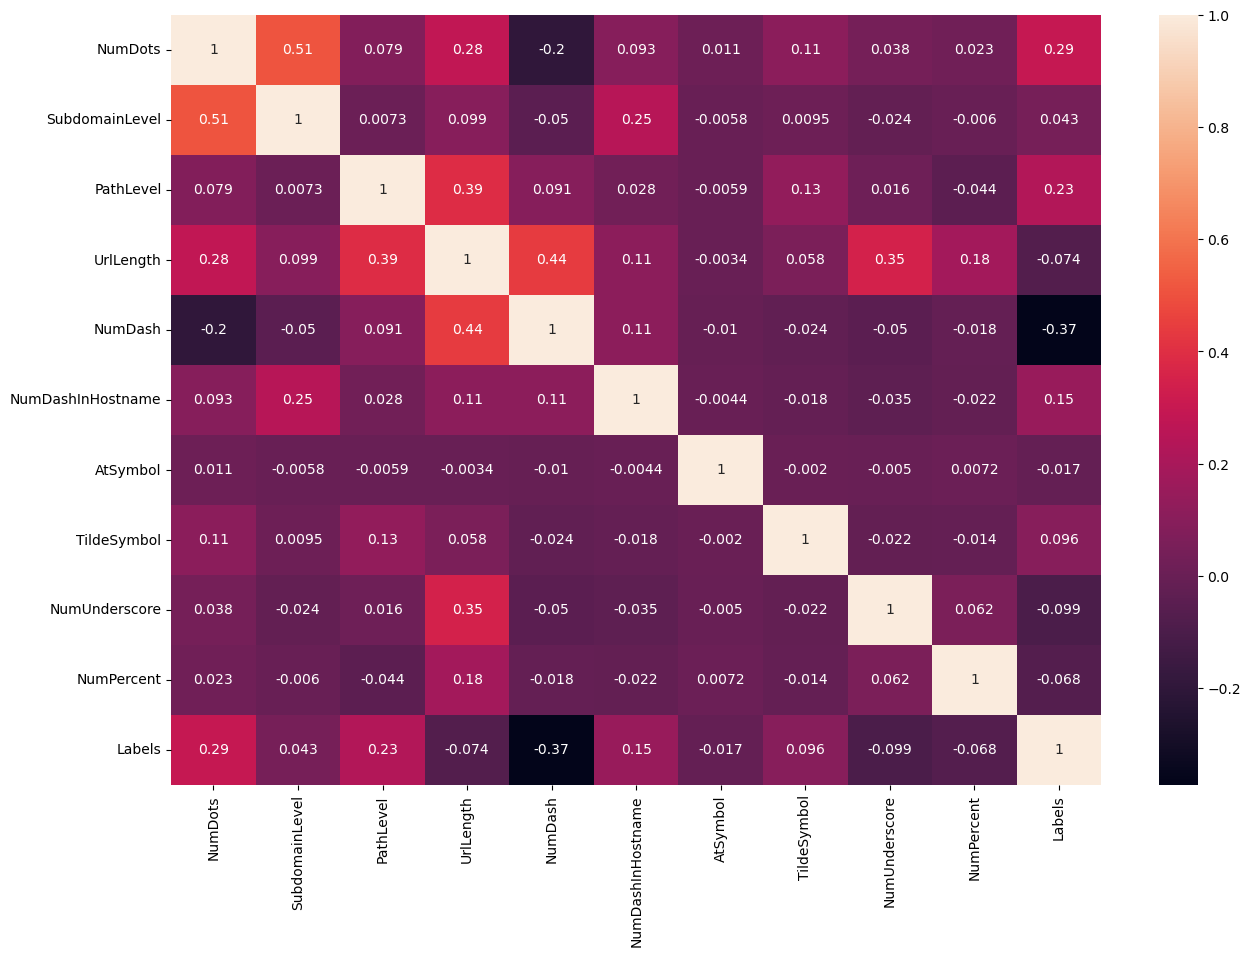

In [30]:
plt.figure(figsize=(15,10))
pd.set_option('display.max_columns',None)
plt.rcParams['figure.figsize'] = (15,10)
corr_heatmap(df,0,10)

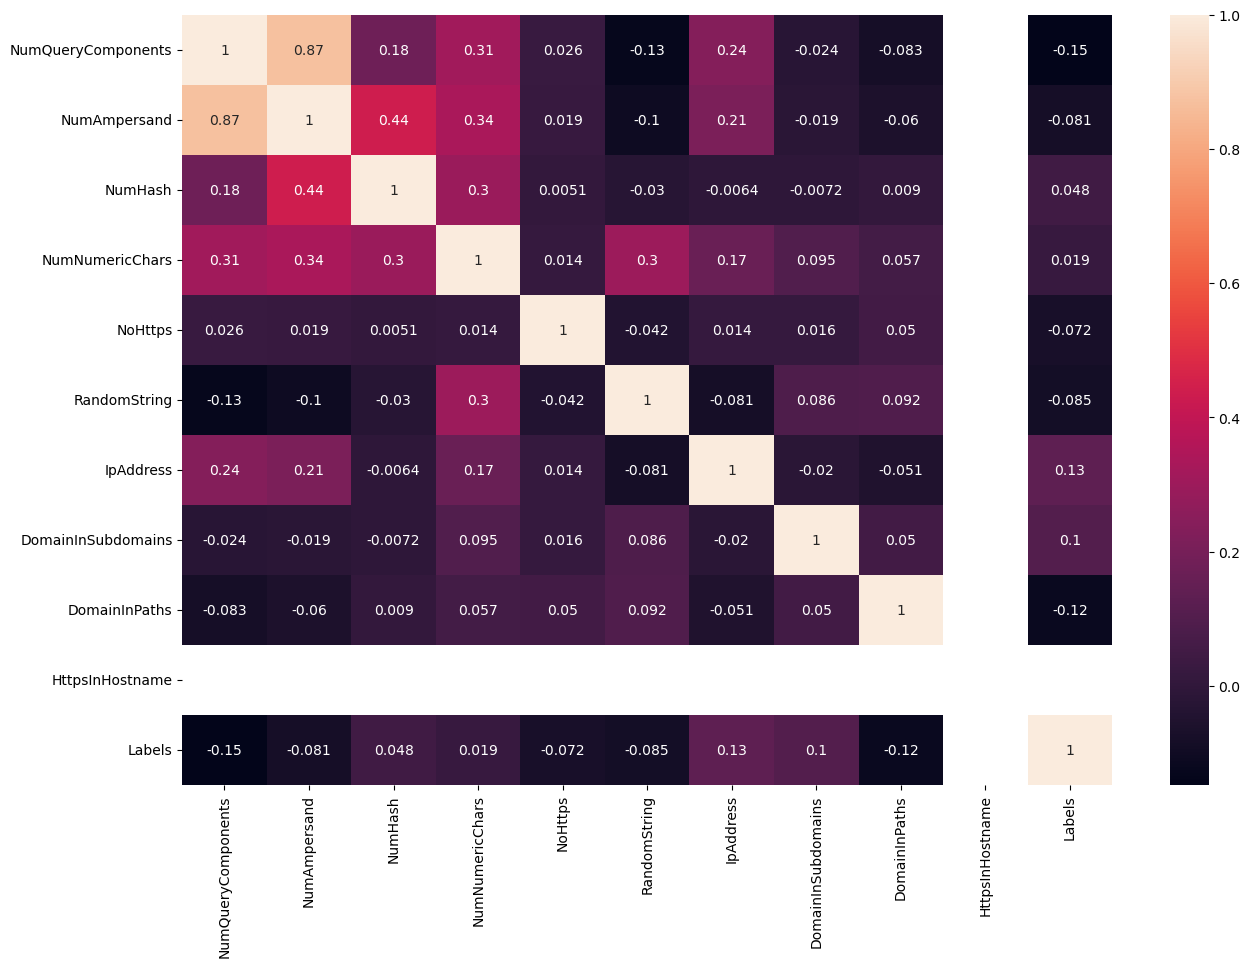

In [31]:
corr_heatmap(df,10,20)

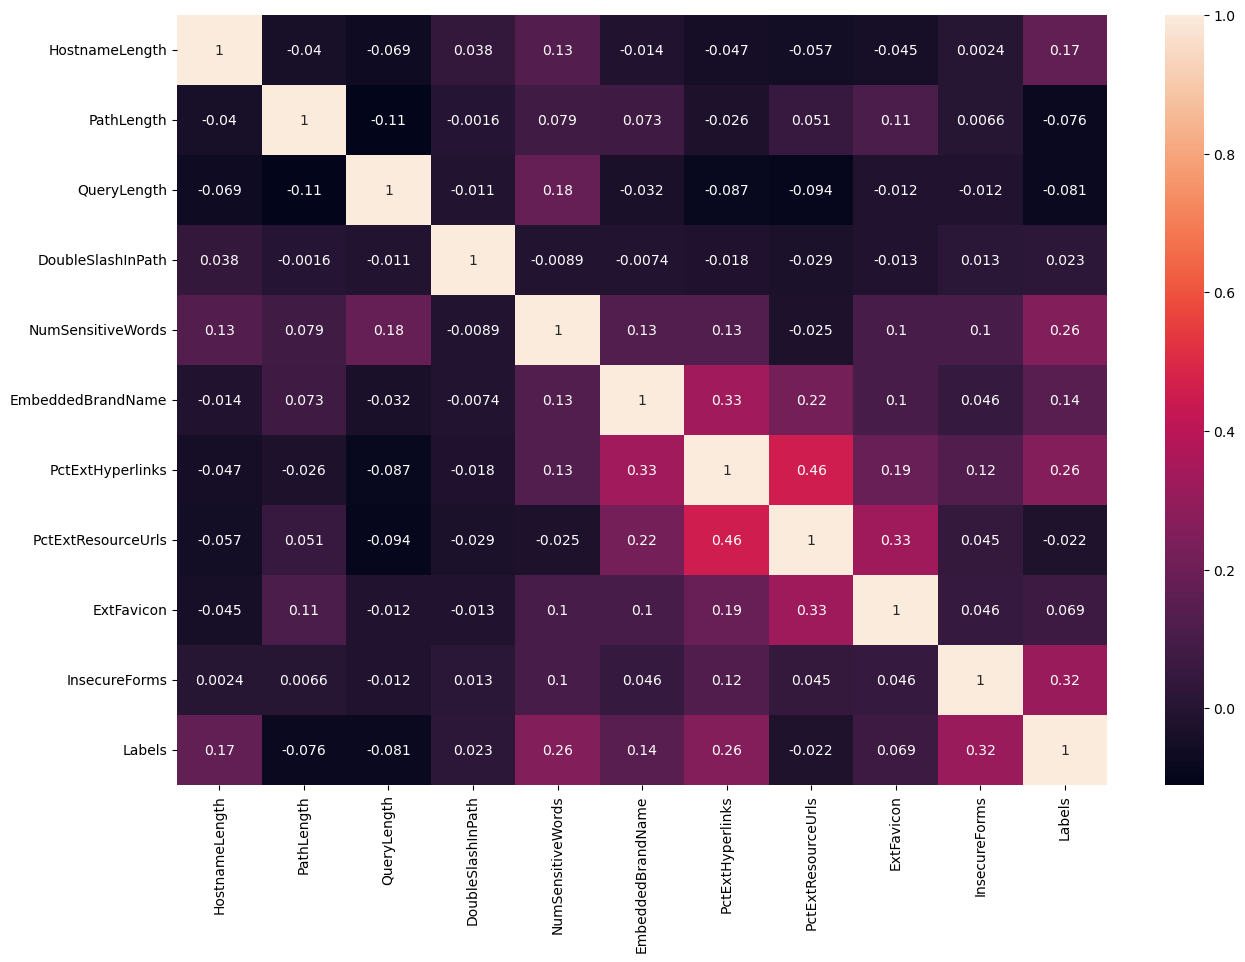

In [32]:
corr_heatmap(df,20,30)

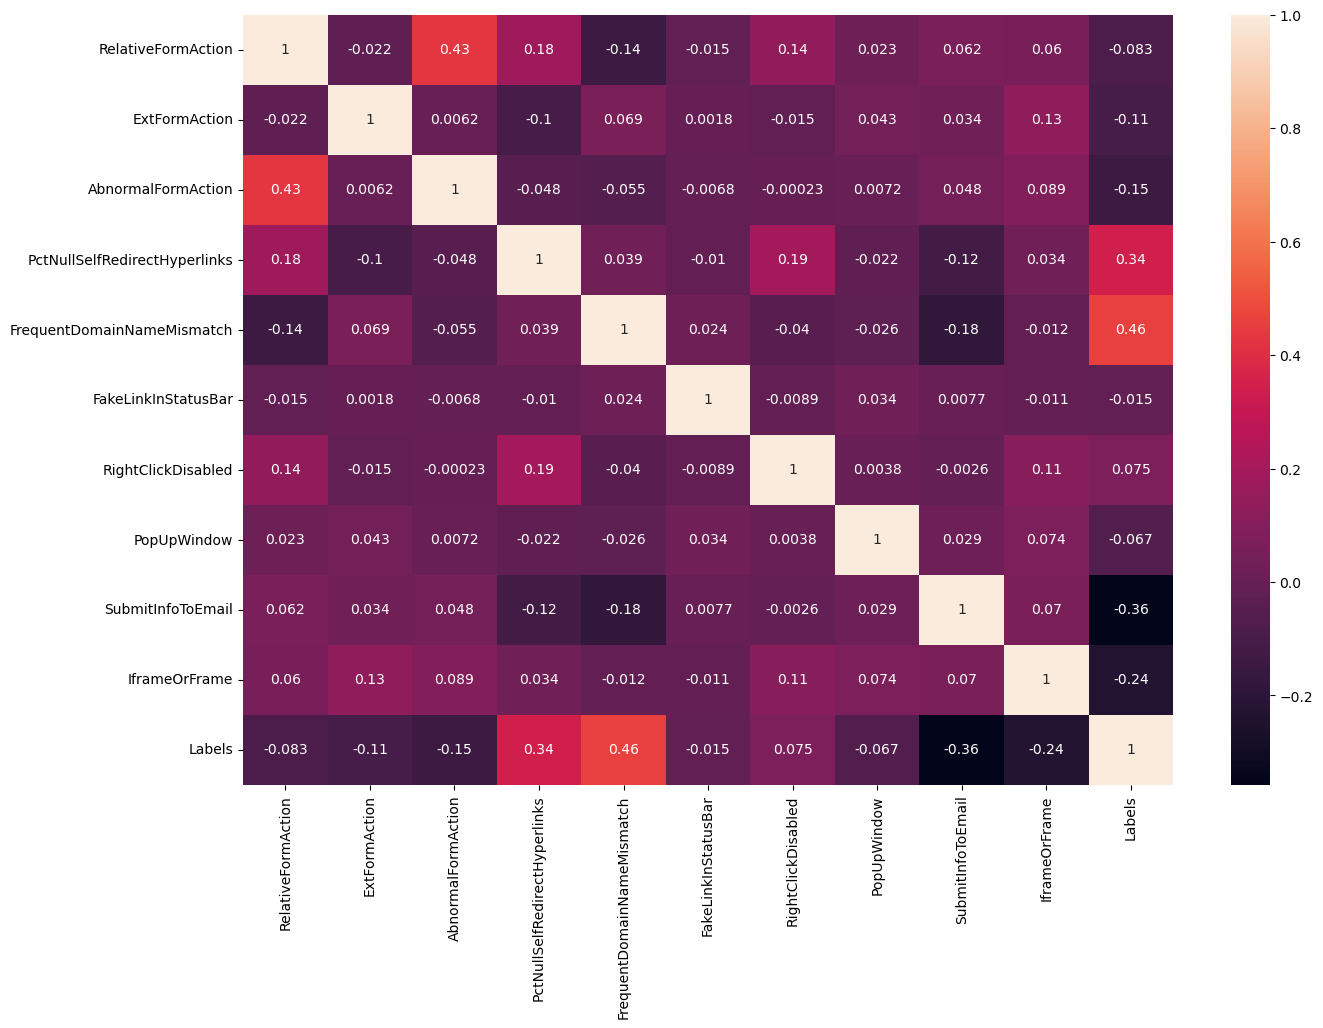

In [33]:
corr_heatmap(df,30,40)

In [34]:
# Using sklearn for feature Selection

In [35]:
from sklearn.feature_selection import mutual_info_classif

In [36]:
X = df.drop(labels='Labels',axis=1)

In [37]:
X

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000000,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1
9996,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1
9997,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1
9998,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1


In [38]:
y = df[['Labels']]

In [39]:
y

,Labels
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


In [40]:
#discrete_features = X.dtypes == int

In [41]:
mi_score = mutual_info_classif(X,y)

In [42]:
mi_score = pd.Series(mi_score,name="Mi Score",index = X.columns)

In [43]:
mi_score = mi_score.sort_values(ascending=False)

In [44]:
mi_score

PctExtHyperlinks                      0.467264
PctExtResourceUrls                    0.295374
PctNullSelfRedirectHyperlinks         0.229809
PctExtNullSelfRedirectHyperlinksRT    0.214334
NumNumericChars                       0.131246
FrequentDomainNameMismatch            0.124813
ExtMetaScriptLinkRT                   0.117585
NumDash                               0.111288
SubmitInfoToEmail                     0.075579
NumDots                               0.071053
InsecureForms                         0.060211
PathLength                            0.059858
PathLevel                             0.053214
NumSensitiveWords                     0.045393
QueryLength                           0.040985
UrlLength                             0.037434
NumQueryComponents                    0.029979
HostnameLength                        0.027044
PctExtResourceUrlsRT                  0.024513
UrlLengthRT                           0.021818
IframeOrFrame                         0.021321
AbnormalExtFo

In [45]:
def plot_mi_scores(scores):
    
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title("MI Scores")

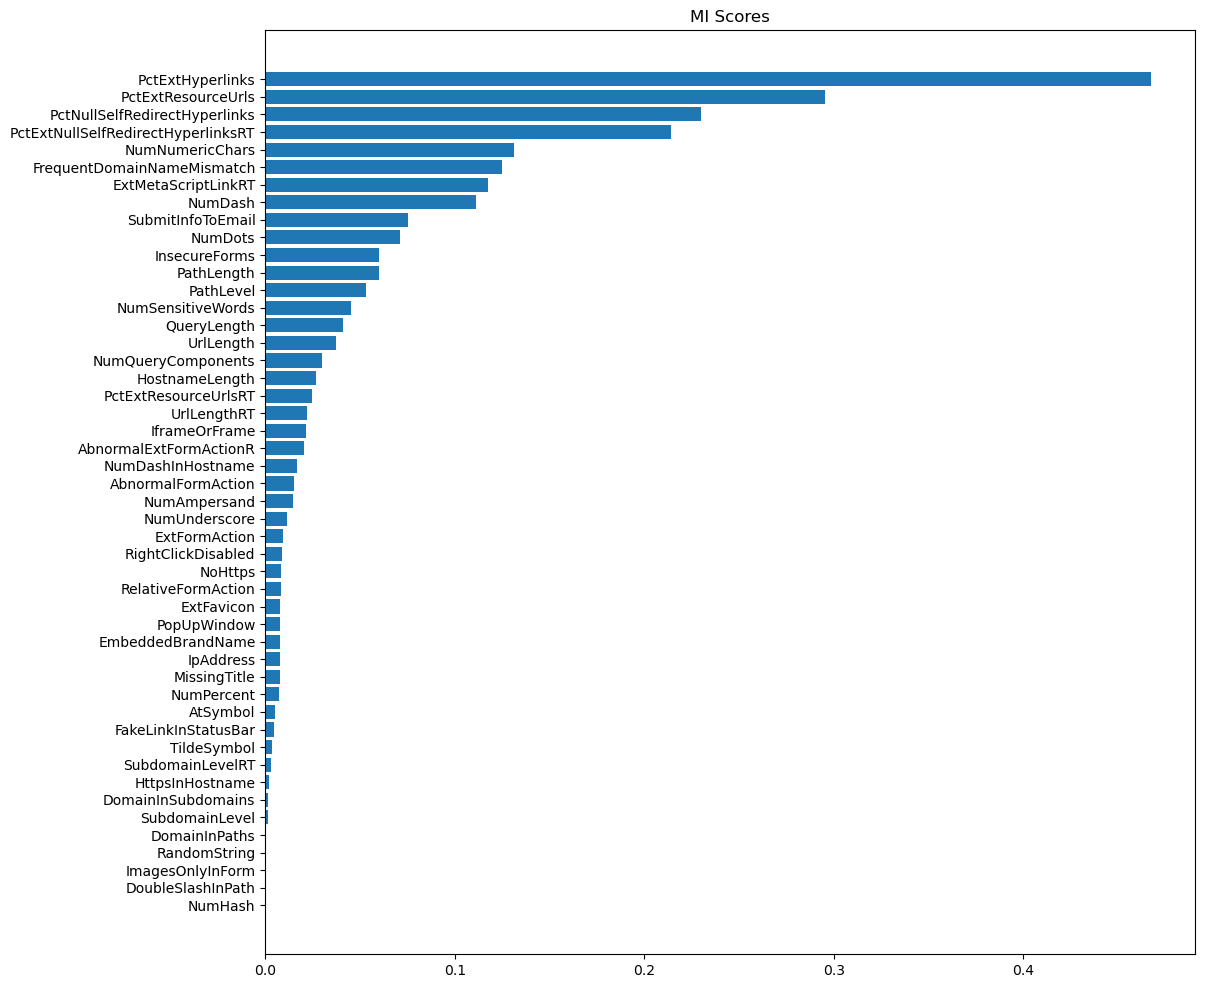

In [46]:
plt.figure(figsize=(12,12))
plot_mi_scores(mi_score)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
def train_logistic(data,top_n):
    
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    
    X = data[top_n_features]
    y = data['Labels']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True)
    
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    return precision,accuracy,recall,f1

In [49]:
log_scores = []

In [50]:
for i in range(20,51):
    
    precision,accuracy,recall,f1 = train_logistic(df,i)
    
    log_scores.append([i,precision,accuracy,recall,f1])

In [51]:
log_scores

[[20, 0.9014634146341464, 0.91, 0.9212362911266201, 0.9112426035502958],
 [21, 0.9040697674418605, 0.9115, 0.9228486646884273, 0.9133627019089574],
 [22, 0.9077809798270894, 0.916, 0.9292035398230089, 0.9183673469387755],
 [23, 0.9114785992217899, 0.9325, 0.9551478083588175, 0.9328023892483822],
 [24, 0.9102927289896129, 0.9205, 0.9377431906614786, 0.9238140872065165],
 [25, 0.907843137254902, 0.9185, 0.9306532663316583, 0.919106699751861],
 [26, 0.9074427480916031, 0.921, 0.9397233201581028, 0.9233009708737864],
 [27, 0.9035433070866141, 0.914, 0.9254032258064516, 0.9143426294820716],
 [28, 0.9022988505747126, 0.9095, 0.9226248775710089, 0.9123486682808717],
 [29, 0.903558052434457, 0.916, 0.9368932038834952, 0.9199237368922785],
 [30, 0.9196940726577438, 0.93, 0.9449901768172888, 0.9321705426356589],
 [31, 0.9083820662768031, 0.924, 0.9414141414141414, 0.9246031746031745],
 [32, 0.9177153920619555, 0.9255, 0.9367588932806324, 0.9271393643031786],
 [33, 0.9205426356589147, 0.929, 0.94

In [52]:
# converting scores in DataFrame

In [53]:
score_log = pd.DataFrame(log_scores,columns=['top_features','precision','accuracy','recall','f1'])

In [54]:
score_log

,top_features,precision,accuracy,recall,f1
0,20,0.901463,0.9100,0.921236,0.911243
1,21,0.904070,0.9115,0.922849,0.913363
2,22,0.907781,0.9160,0.929204,0.918367
3,23,0.911479,0.9325,0.955148,0.932802
4,24,0.910293,0.9205,0.937743,0.923814
5,25,0.907843,0.9185,0.930653,0.919107
6,26,0.907443,0.9210,0.939723,0.923301
7,27,0.903543,0.9140,0.925403,0.914343
8,28,0.902299,0.9095,0.922625,0.912349
9,29,0.903558,0.9160,0.936893,0.919924


In [55]:
# Creating a plot of performance score for better decision

In [56]:
font_dict = {
    'family': 'serif',  # Font family ('serif', 'sans-serif', 'monospace', etc.)
    'style': 'italic',  # Font style ('normal', 'italic', 'oblique')
    'weight': 'bold',   # Font weight ('normal', 'bold', 'heavy', 'light', etc.)
    'size': 20,         # Font size
}

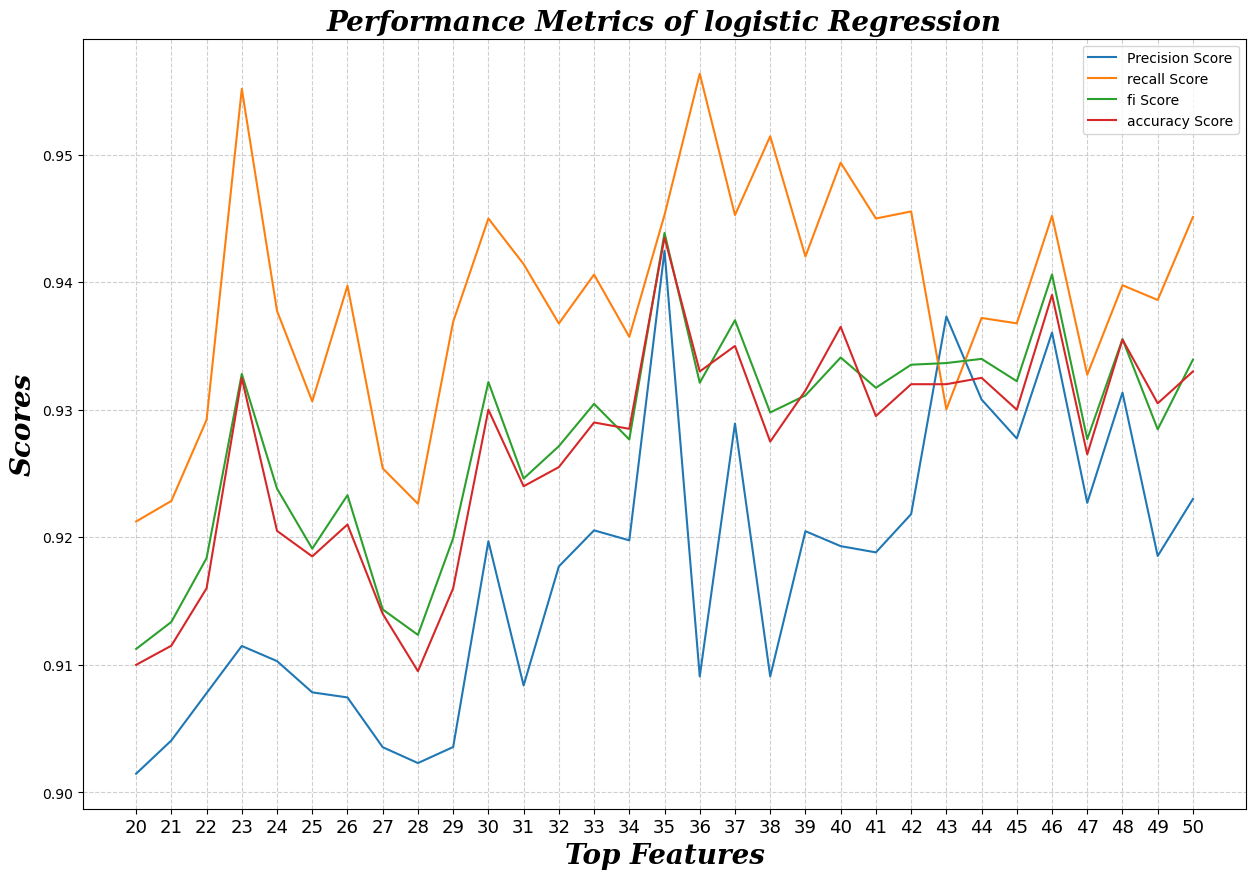

<Figure size 1500x1500 with 0 Axes>

In [57]:
sns.lineplot(data=score_log,x='top_features',y='precision',label='Precision Score')
sns.lineplot(data=score_log,x='top_features',y='recall',label='recall Score')
sns.lineplot(data=score_log,x='top_features',y='f1',label='fi Score')
sns.lineplot(data=score_log,x='top_features',y='accuracy',label='accuracy Score')

plt.grid(True,linestyle='--',alpha=0.6)
plt.xlabel('Top Features',fontdict=font_dict)
plt.ylabel('Scores',fontdict=font_dict)
plt.xticks(list(range(20,51)),fontsize=13)
plt.title('Performance Metrics of logistic Regression',fontdict=font_dict)
plt.figure(figsize=(15,15))
plt.show()

In [58]:
# Here we can we see selecting top 27 or 28 features can give a good score of all performance metrics
# This Scores are given by Logistic regression model

In [59]:
# random Forest Classifier

In [60]:
def train_rfc(data,top_n):
    
    top_n_features = mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    
    X = data[top_n_features]
    y = data['Labels']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True)
    
    rfc = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=32,max_features=1.0)
    rfc.fit(X_train,y_train)
    
    y_pred = rfc.predict(X_test)
    
    precision = precision_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    return precision,accuracy,recall,f1

In [61]:
rfc_scores = []

In [62]:
for i in range(20,51):
    
    precision,accuracy,recall,f1 = train_rfc(df,i)
    print(f'{i} Precision:{precision} Accuracy:{accuracy} Recall:{recall} F1:{f1}')
    rfc_scores.append([i,precision,accuracy,recall,f1])

20 Precision:0.9774288518155054 Accuracy:0.978 Recall:0.9793510324483776 F1:0.9783889980353635
21 Precision:0.9693675889328063 Accuracy:0.9745 Recall:0.98001998001998 F1:0.9746646795827123
22 Precision:0.9743852459016393 Accuracy:0.9745 Recall:0.9733879222108496 F1:0.9738863287250383
23 Precision:0.9653465346534653 Accuracy:0.9695 Recall:0.974025974025974 F1:0.9696668324216807
24 Precision:0.974120082815735 Accuracy:0.972 Recall:0.9681069958847737 F1:0.9711042311661506
25 Precision:0.9755620723362659 Accuracy:0.9775 Recall:0.9803536345776032 F1:0.9779519843214111
26 Precision:0.9815950920245399 Accuracy:0.9815 Recall:0.9805924412665986 F1:0.9810935104752172
27 Precision:0.9829317269076305 Accuracy:0.985 Recall:0.9868951612903226 F1:0.9849094567404426
28 Precision:0.9825072886297376 Accuracy:0.9825 Recall:0.9834630350194552 F1:0.9829849295089936
29 Precision:0.9757820383451059 Accuracy:0.9845 Recall:0.9928131416837782 F1:0.9842239185750635
30 Precision:0.97534516765286 Accuracy:0.9775 R

In [63]:
# converting rfc scores into DataFrame

In [64]:
rfc_scores

[[20, 0.9774288518155054, 0.978, 0.9793510324483776, 0.9783889980353635],
 [21, 0.9693675889328063, 0.9745, 0.98001998001998, 0.9746646795827123],
 [22, 0.9743852459016393, 0.9745, 0.9733879222108496, 0.9738863287250383],
 [23, 0.9653465346534653, 0.9695, 0.974025974025974, 0.9696668324216807],
 [24, 0.974120082815735, 0.972, 0.9681069958847737, 0.9711042311661506],
 [25, 0.9755620723362659, 0.9775, 0.9803536345776032, 0.9779519843214111],
 [26, 0.9815950920245399, 0.9815, 0.9805924412665986, 0.9810935104752172],
 [27, 0.9829317269076305, 0.985, 0.9868951612903226, 0.9849094567404426],
 [28, 0.9825072886297376, 0.9825, 0.9834630350194552, 0.9829849295089936],
 [29, 0.9757820383451059, 0.9845, 0.9928131416837782, 0.9842239185750635],
 [30, 0.97534516765286, 0.9775, 0.9801783944499505, 0.9777558082056352],
 [31, 0.9712301587301587, 0.976, 0.9809619238476954, 0.9760717846460618],
 [32, 0.9812623274161736, 0.9785, 0.9764474975466143, 0.9788489916379735],
 [33, 0.9830339321357285, 0.9825, 0

In [65]:
score_rfc = pd.DataFrame(rfc_scores,columns=['top_features','precision','accuracy','recall','f1'])

In [66]:
score_rfc

,top_features,precision,accuracy,recall,f1
0,20,0.977429,0.9780,0.979351,0.978389
1,21,0.969368,0.9745,0.980020,0.974665
2,22,0.974385,0.9745,0.973388,0.973886
3,23,0.965347,0.9695,0.974026,0.969667
4,24,0.974120,0.9720,0.968107,0.971104
5,25,0.975562,0.9775,0.980354,0.977952
6,26,0.981595,0.9815,0.980592,0.981094
7,27,0.982932,0.9850,0.986895,0.984909
8,28,0.982507,0.9825,0.983463,0.982985
9,29,0.975782,0.9845,0.992813,0.984224


In [67]:
# Creating a plot of performance score for better decision

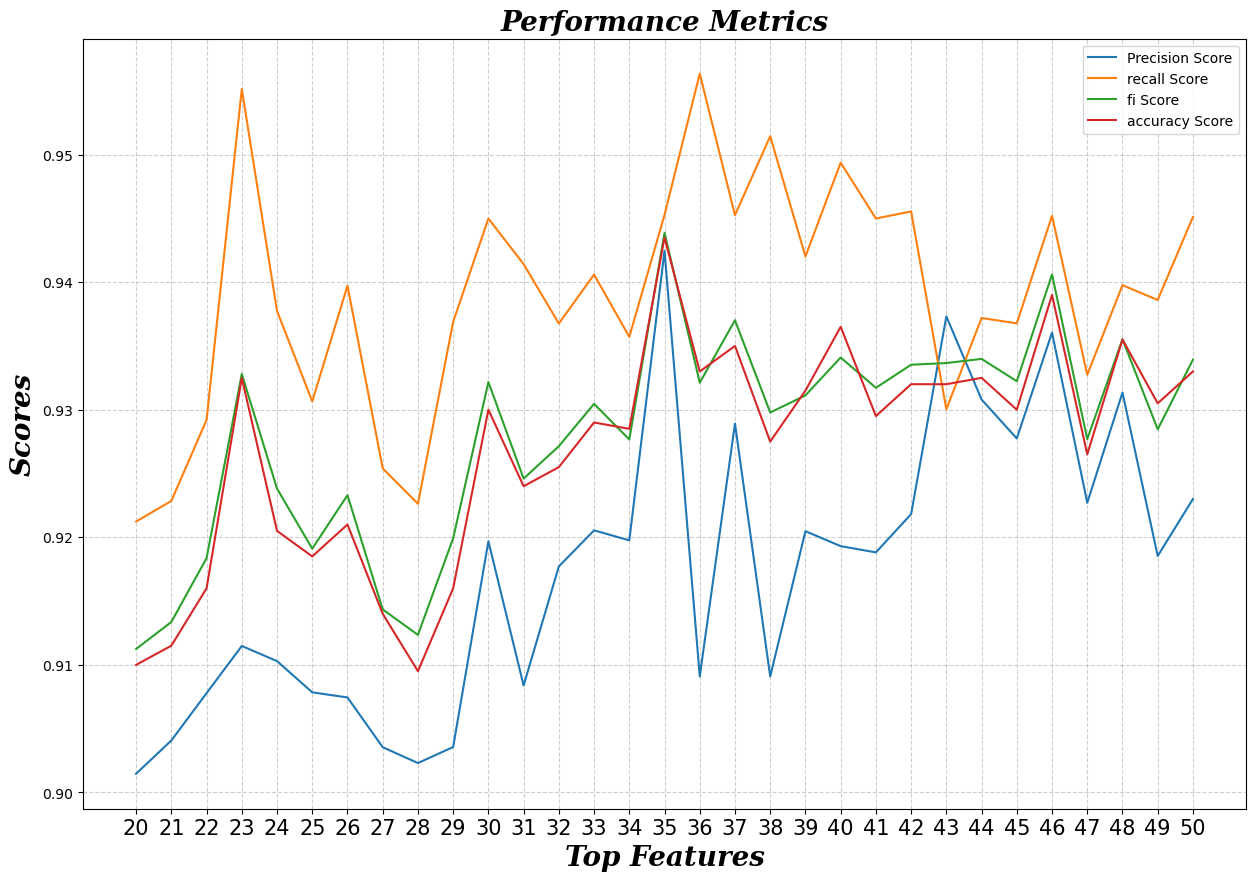

<Figure size 500x500 with 0 Axes>

In [68]:
sns.lineplot(data=score_log,x='top_features',y='precision',label='Precision Score')
sns.lineplot(data=score_log,x='top_features',y='recall',label='recall Score')
sns.lineplot(data=score_log,x='top_features',y='f1',label='fi Score')
sns.lineplot(data=score_log,x='top_features',y='accuracy',label='accuracy Score')

plt.grid(True,linestyle='--',alpha=0.6)
plt.xlabel('Top Features',fontdict=font_dict)
plt.ylabel('Scores',fontdict=font_dict)
plt.xticks(list(range(20,51)),fontsize=15)
plt.title('Performance Metrics',fontdict=font_dict)
plt.figure(figsize=(5,5))
plt.show()

In [69]:
# Here we can we see selecting top 27 or 28 features can give a good score of all performance metrics
# This Scores are given by Random Forest Classifier model

### Training Our model by Random Forest Classifier

In [72]:
top_n_features = mi_score.sort_values(ascending=False).head(28).index.tolist()    

X = df[top_n_features]
y = df['Labels']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True)
    
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=32,max_features=1.0)
rfc.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=32, max_features=1.0,
                       n_estimators=200)

In [73]:
# Predicting the values

In [74]:
y_pred = rfc.predict(X_test)

In [75]:
# performance metrics

In [76]:
precision = precision_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [77]:
from sklearn.metrics import classification_report

In [78]:
report = classification_report(y_test,y_pred)

In [80]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       993
           1       0.98      0.98      0.98      1007

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

